In [ ]:
#EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sampling Libraries
from sklearn.model_selection import StratifiedShuffleSplit

# Data Transformation Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Data Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#GridSearchCV
from sklearn.model_selection import GridSearchCV

#Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Custom Evaluation Metric
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [ ]:
#importing the dataset

url='https://drive.google.com/file/d/1-xTTTJ7XEH40PZO0s4j6j_QTI6751hHr/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

In [ ]:
data.shape

(29531, 16)

In [ ]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
#rows with null value in AQI column dropped since it is the target variable

data = data.dropna(axis = 0, subset = ['AQI'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24172 non-null  float64
 3   PM10        17764 non-null  float64
 4   NO          24463 non-null  float64
 5   NO2         24459 non-null  float64
 6   NOx         22993 non-null  float64
 7   NH3         18314 non-null  float64
 8   CO          24405 non-null  float64
 9   SO2         24245 non-null  float64
 10  O3          24043 non-null  float64
 11  Benzene     21315 non-null  float64
 12  Toluene     19024 non-null  float64
 13  Xylene      9478 non-null   float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [ ]:
print(data.isnull().sum())

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64


In [ ]:
data.replace(to_replace=[None, ''], value=np.nan, inplace=True)

<ipython-input-9-80a263303b66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace=[None, ''], value=np.nan, inplace=True)


In [ ]:
#numerical features

numerical_features = ['PM2.5', 'PM10', 'NO','NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

In [ ]:
#drop date column because our model will predict air quality based on physical and geographic parameters and not as a time series
#drop xylene column because more than half of the data is missing

drop_columns = ['Date', 'Xylene']

In [ ]:
#nominal feature

nominal_features = ['City']

In [ ]:
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
data['City'].value_counts()

City
Delhi                 1999
Bengaluru             1910
Lucknow               1893
Chennai               1884
Hyderabad             1880
Patna                 1459
Gurugram              1453
Ahmedabad             1334
Visakhapatnam         1171
Amritsar              1126
Jaipur                1094
Thiruvananthapuram    1052
Amaravati              841
Mumbai                 775
Jorapokhar             771
Kolkata                754
Brajrajnagar           713
Talcher                698
Guwahati               495
Coimbatore             344
Chandigarh             299
Bhopal                 278
Shillong               205
Kochi                  158
Ernakulam              153
Aizawl                 111
Name: count, dtype: int64

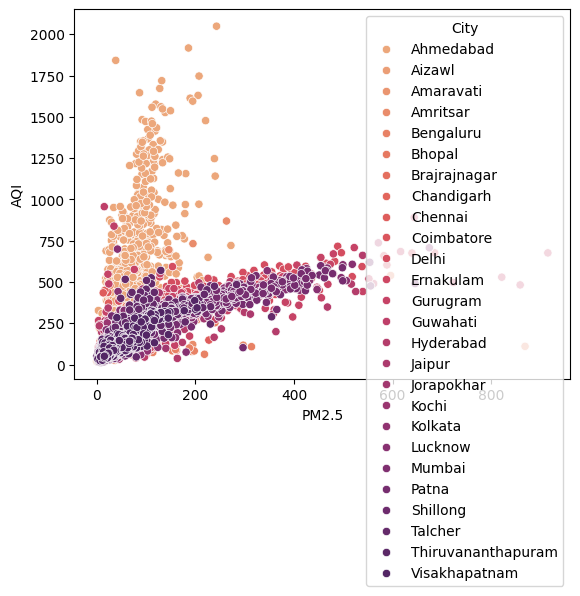

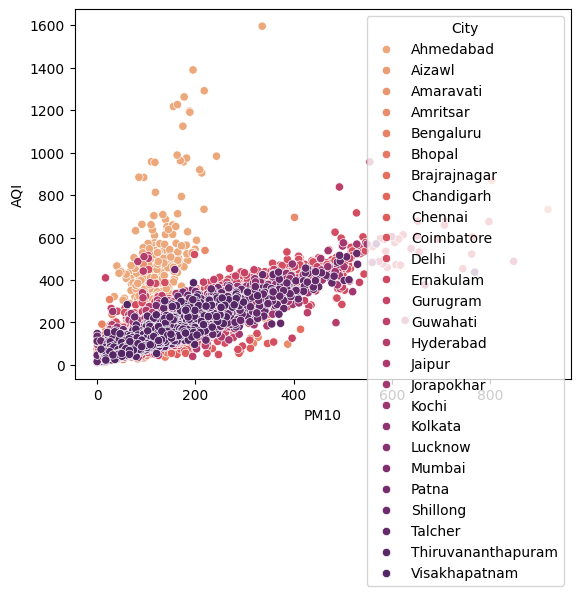

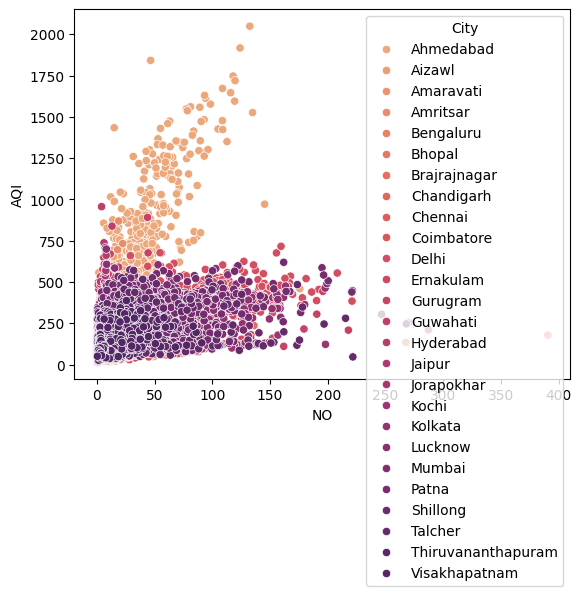

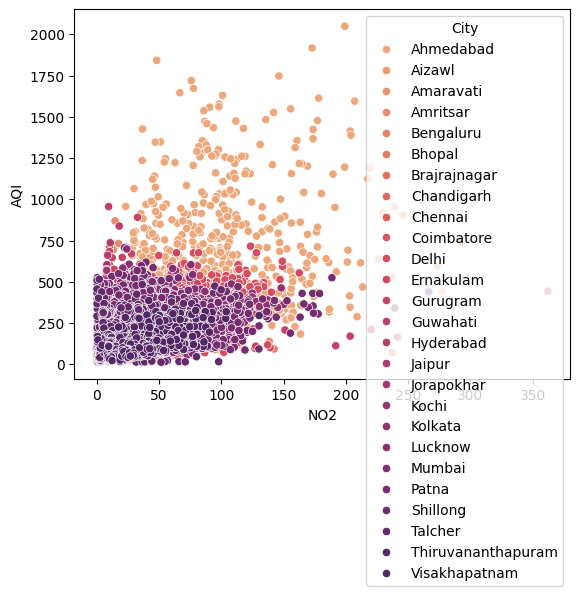

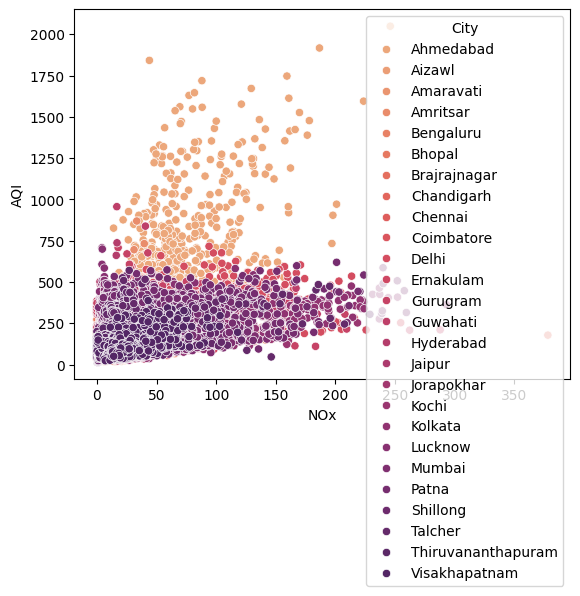

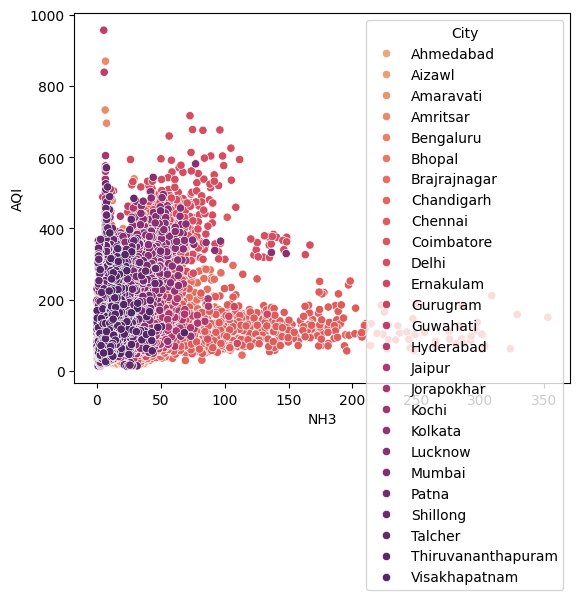

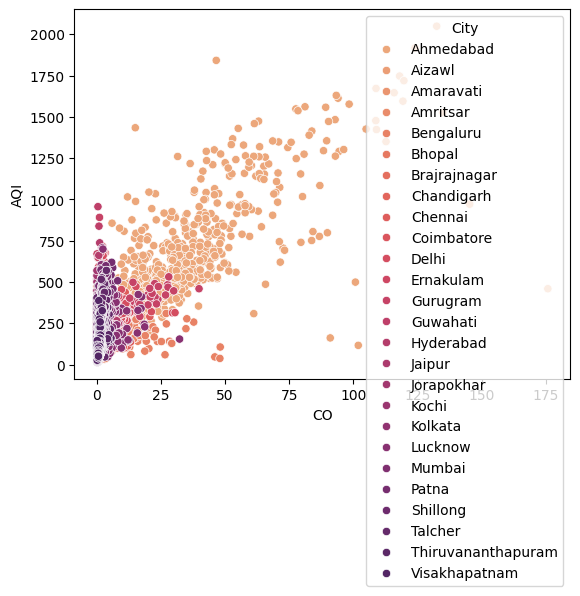

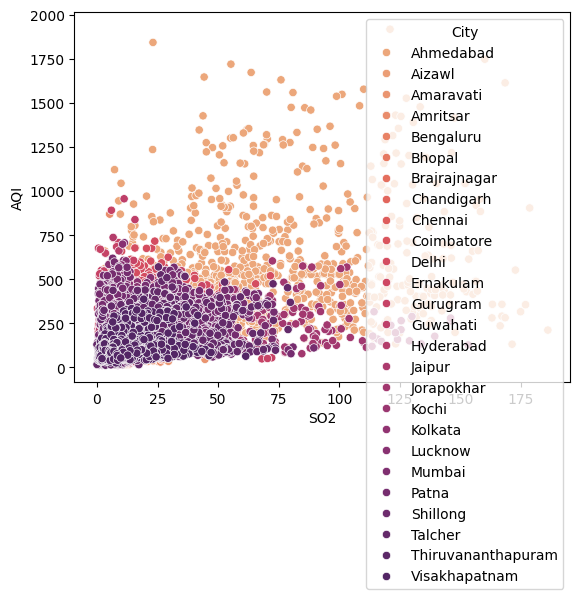

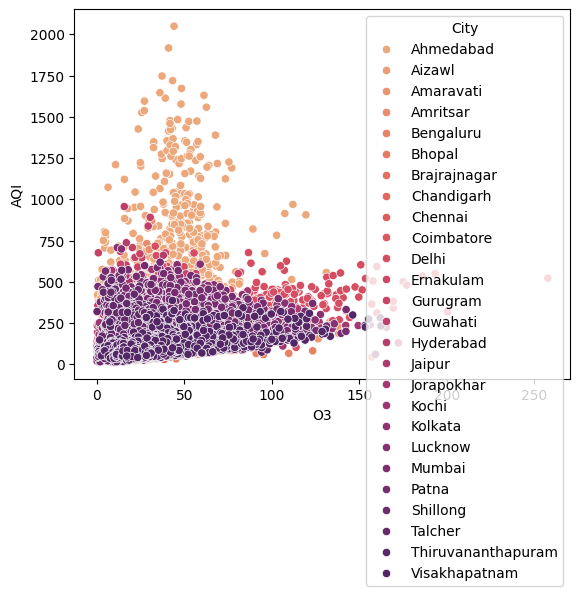

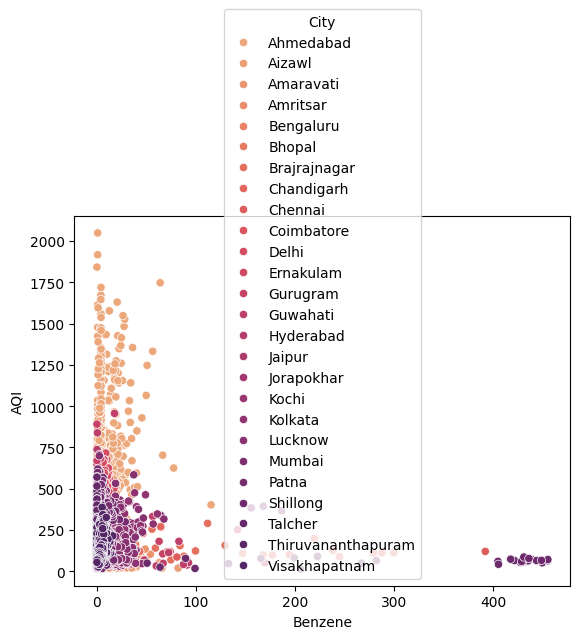

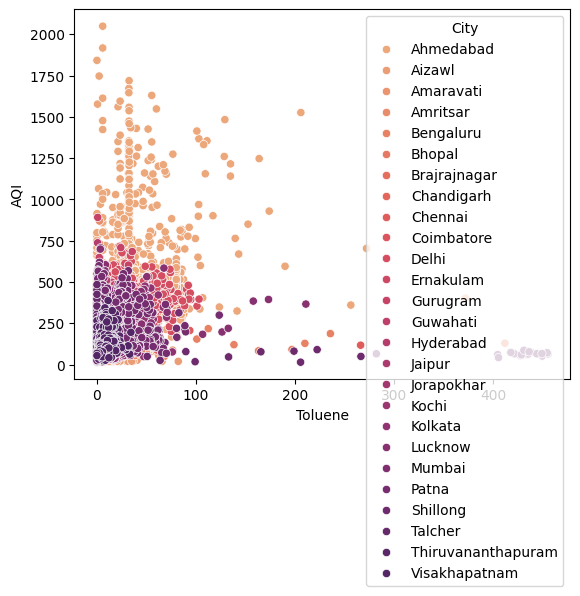

In [ ]:
#plotting numerical features against target column color coded city wise

for feat in numerical_features:
    sns.scatterplot(x = feat, y = 'AQI', hue = 'City', palette = 'flare', data = data)
    plt.show()

Data clustered by cities

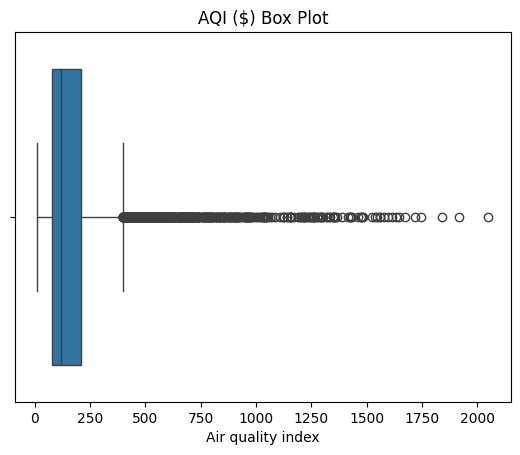

In [ ]:
#checking for outliers

sns.boxplot(data=data, x='AQI')
plt.title('AQI ($) Box Plot')
plt.xlabel('Air quality index')
plt.show()

outliers occur as natural variation in data and do not need to be processed

In [ ]:
#checking correlation in data using heatmap

correlation_matrix = data.corr()

#  //Create the heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Ahmedabad'

# Data Preprocessing

In [ ]:
data.index

data indexed incorrectly

In [ ]:
#fixing the data indexing

data.reset_index(inplace = True, drop = True)

In [ ]:
data.index

In [ ]:
#splitting the training and testing data using stratified sampling over the city column

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["City"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
strat_train_set.shape

In [ ]:
strat_test_set.shape

In [ ]:
strat_train_set['City'].value_counts()

In [ ]:
strat_test_set['City'].value_counts()

In [ ]:
#splitting the features and target columns

X_train = strat_train_set.drop(['AQI', 'AQI_Bucket'], axis = 1)
y_train_reg = strat_train_set['AQI']
y_train_cl = strat_train_set['AQI_Bucket']

X_test = strat_test_set.drop(['AQI', 'AQI_Bucket'], axis = 1)
y_test_reg = strat_test_set['AQI']
y_test_cl = strat_test_set['AQI_Bucket']

In [ ]:
X_train.head()

In [ ]:
#function to replace the missing numerical features by the mean of that feature in its respective city

def FillMissingValues(X):
    for feat in numerical_features:
        X[feat] = X[feat].fillna(X.groupby('City')[feat].transform('mean'))
    return X

In [ ]:
X_train = FillMissingValues(X_train)
X_test = FillMissingValues(X_test)

In [ ]:
X_train.head()

As we can see, still some null values remain. We will replace them later by using SimpleImputer()

In [ ]:
numerical_pipeline = Pipeline([('simple imputer', SimpleImputer()), ("std scaler", StandardScaler())])
nominal_pipeline = Pipeline([ ("one hot encoding", OneHotEncoder() ) ])

In [ ]:
pipeline = ColumnTransformer([
    ("numerical pipeline", numerical_pipeline, numerical_features),
    ("nominal pipeline", nominal_pipeline, nominal_features),
    ("drop columns", "drop", drop_columns)

])

In [ ]:
output_columns = ['PM2.5', 'PM10', 'NO','NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam']

In [ ]:
#transforming the train data through our pipeline

X_train_tr = pipeline.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr, columns=output_columns)

In [ ]:
#transforming the test data through our pipeline

X_test_tr = pipeline.fit_transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns=output_columns)

In [ ]:
#transformed training dataset ready to train our model

X_train_tr.head()

# Model Training and Testing

In [ ]:
#function to generate model report in tabular format

def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(model_name, end="\n\n")
        print(row.format("", train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)

In [ ]:
models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

In [ ]:
generate_models_report(models, X_train_tr, y_train_reg, X_test_tr, y_test_reg)

RandomForestRegressor() gives the best test and train accuracy, therefore we tune its parameters to produce the best fitting model

# Hyperparameter Tuning

In [ ]:
params = [
    {
        "n_estimators": [200],
        "max_depth": [25],
        "min_samples_split": [15],
        "max_features": [10, 15, 26, 37]
    }
]

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring="r2")
grid_search.fit(X_train_tr, y_train_reg)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_

In [ ]:
models  = [RandomForestRegressor(max_depth = 25, max_features=15, min_samples_split=8,
                      n_estimators=200, random_state=42), RandomForestRegressor(max_depth = 25, max_features=15, min_samples_split=10,
                      n_estimators=200, random_state=42), RandomForestRegressor(max_depth = 25, max_features=15, min_samples_split=15,
                      n_estimators=200, random_state=42)]

In [ ]:
generate_models_report(models, X_train_tr, y_train_reg, X_test_tr, y_test_reg)

In [ ]:
models  = [RandomForestRegressor(max_depth = 20, max_features=15, min_samples_split=10,
                      n_estimators=190, random_state=42), RandomForestRegressor(max_depth = 25, max_features=15, min_samples_split=10,
                      n_estimators=200, random_state=42), RandomForestRegressor(max_depth = 30, max_features=15, min_samples_split=10,
                      n_estimators=210, random_state=42)]

In [ ]:
generate_models_report(models, X_train_tr, y_train_reg, X_test_tr, y_test_reg)

In [ ]:
#best model

reg = RandomForestRegressor(max_depth = 25, max_features=15, min_samples_split=10, n_estimators=200, random_state = 42)
reg.fit(X_train_tr, y_train_reg)

In [ ]:
predictions = reg.predict(X_test_tr)

# Model Evaluation

In [ ]:
#plotting the predicted values against actual values

sns.regplot(x = y_test_reg ,y = predictions, scatter_kws= {'color': 'black'}, line_kws= {'color': 'red'})

In [ ]:
# MAE
mean_absolute_error(y_test_reg, predictions)

In [ ]:
# RMSE
rmse(y_test_reg, predictions)

In [ ]:
# R-Squared
r2_score(y_test_reg, predictions)

In [ ]:
accuracy = (r2_score(y_test_reg, predictions))*100
print(f'Accuracy: {accuracy}')